In [1]:
#import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
#import psycopg2

In [2]:
pip install neptune-notebooks

Note: you may need to restart the kernel to use updated packages.


In [3]:
! pip install neptune-client


In [4]:
# Create Connection
#conn = psycopg2.connect(database="postgres", user="postgres", password="admin", host="127.0.0.1", port="5432")
#print("Database opened successfully")

In [26]:
import neptune.new as neptune

run = neptune.init(project='lwatson/homeless-edu', api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJkNzRkYTc1MC1jZjI5LTRkMzctYTU3OC1hMzUwMjU0NTczZDkifQ==')

https://app.neptune.ai/lwatson/homeless-edu/e/HOM-4


In [27]:
# Create a cursor object
#cur = conn.cursor()

In [28]:
# A sample query of all data from the "homeless_edu" table in the "posgres" database 
#cur.execute("""SELECT * FROM homeless_edu""")
#homeless_edu = cur.fetchall()
#print(homeless_edu)

In [29]:
df = pd.read_csv('homeless_edu.csv')
df.head()

,Year,State,TOTAL_REVENUE,TOTAL_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,Homeless_Count
0,2007,AK,1800616,1938755,1679,9625,9420,9953,10092,77676,42049,131029,7124
1,2007,AL,7069040,7196459,3592,55972,57795,58792,46200,466414,216941,742919,23794
2,2007,AR,4415981,4779308,12795,38192,35710,35944,30708,288518,138921,479016,17048
3,2007,AZ,8724434,8709531,15854,86742,82876,81196,76275,668290,316376,1087447,64192
4,2007,CA,72516936,73225422,68002,454743,467305,490054,468281,3801685,2011865,6343471,636626


In [30]:
# Create DataFrame
#df = pd.DataFrame(homeless_edu, columns=["State_Year", 'TOTAL_REVENUE','TOTAL_EXPENDITURE','GRADES_PK_G','GRADES_KG_G','GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G', "Homeless_Count"])

#drop columns
df = df.drop(columns=['State'])
df.head()

,Year,TOTAL_REVENUE,TOTAL_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,Homeless_Count
0,2007,1800616,1938755,1679,9625,9420,9953,10092,77676,42049,131029,7124
1,2007,7069040,7196459,3592,55972,57795,58792,46200,466414,216941,742919,23794
2,2007,4415981,4779308,12795,38192,35710,35944,30708,288518,138921,479016,17048
3,2007,8724434,8709531,15854,86742,82876,81196,76275,668290,316376,1087447,64192
4,2007,72516936,73225422,68002,454743,467305,490054,468281,3801685,2011865,6343471,636626


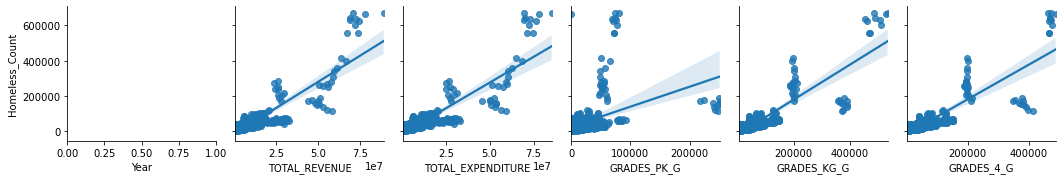

In [31]:
#see what variables have relationship with homeless count
sns.pairplot(df, x_vars=['Year','TOTAL_REVENUE','TOTAL_EXPENDITURE','GRADES_PK_G','GRADES_KG_G','GRADES_4_G'],y_vars='Homeless_Count',kind='reg')

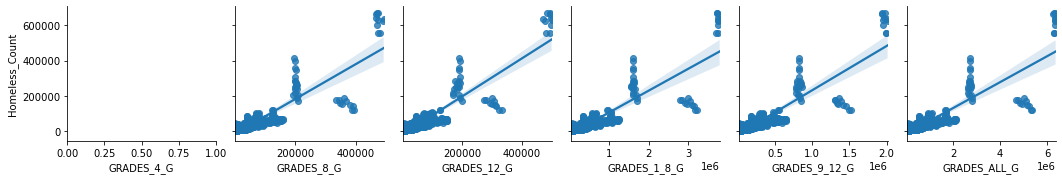

In [32]:
#see what variables have relationship with homeless count
sns.pairplot(df, x_vars=['GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G'],y_vars='Homeless_Count',kind='reg')

In [34]:
#create features 
X = df.drop(columns=['Homeless_Count'])
y = df['Homeless_Count']

In [35]:
#split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [36]:
#create encoder instance
scaler = StandardScaler()

In [37]:
#fit the scaler
X_scaler = scaler.fit(X_train)

In [38]:
#transform data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [39]:
#instantiate model
model = linear_model.LinearRegression()

In [40]:
#fit model
model.fit(X_train_scaled,y_train)

LinearRegression()

In [41]:
#generate predictions
y_pred = model.predict(X_test_scaled)

In [42]:
print(y_pred)

[ 2.22133820e+01  4.32654430e+04 -3.63684888e+02  2.71384500e+04
  5.75513028e+05  6.97103270e+04  8.56391916e+03  2.50615043e+03
  1.56802960e+05  1.80303996e+05  4.14581581e+04  2.27603701e+04
  7.26195026e+04  5.26568569e+04  4.39779943e+04  3.24531273e+04
  5.69656470e+04  4.64971854e+03  2.12014162e+04  8.59943570e+03
  6.09650332e+05  3.03204794e+04  2.86432747e+05  2.03587613e+04
  3.47644761e+04 -7.86033299e+03  8.75118923e+04  2.13398519e+03
  1.38061328e+05  1.99512677e+05  3.02331086e+04  1.61801375e+05
  1.02727061e+04  5.30082665e+04  8.36725364e+04 -6.56091091e+03
  6.02435164e+04  6.80452871e+04  6.60442032e+03  5.65785231e+04
  6.92848523e+03  7.70105459e+04  4.36700005e+03  7.55025007e+04
  5.82835094e+03  9.10885268e+04  3.46554627e+04  9.69541162e+04
  2.44931145e+04  5.40535881e+04  1.79957139e+04  7.06823729e+04
  1.82994617e+04  2.76510810e+04  2.18107659e+04  2.19763874e+04
  2.93738913e+04  4.01781043e+03  6.96218380e+04  1.97590765e+04
  6.78434377e+04  1.54371

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


In [43]:
#get r2 value to determine if model is good fit
metrics.r2_score(y_test, y_pred)

0.9321643153292166

In [44]:
#print result of MAE (mean absolute error)
print(metrics.mean_absolute_error(y_test,y_pred))

20304.478391692246


Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


In [45]:
#print result of MSE (mean squared error)
print(metrics.mean_squared_error(y_test,y_pred))

995095019.3731079


In [46]:
#print result of RMSE (root mean squared error)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

31545.126713537036
